In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation

In [6]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [7]:
batchsize=8
train_folder = "../prepared_data/train"
test_folder = "../prepared_data/test"
model_folder = "./models/"

In [8]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2)

train_data= train_datagen.flow_from_directory(train_folder,
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='training' )

validation_data= train_datagen.flow_from_directory(train_folder,
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical', subset='validation')

Found 67276 images belonging to 2 classes.
Found 16818 images belonging to 2 classes.


In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(test_folder,
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical')

Found 805 images belonging to 2 classes.


In [ ]:
basemodel = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3)))
hmodel = basemodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation= 'softmax')(hmodel)

model = Model(inputs=basemodel.input, outputs= hmodel)
for layer in basemodel.layers:
    layer.trainable = False

83683744/83683744 [==============================] - 29s 0us/step


In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [ ]:
checkpoint = ModelCheckpoint(f'{model_folder}inceptionv3_model.h5',
                            monitor='val_loss',save_best_only=True,verbose=3)

earlystop = EarlyStopping(monitor = 'val_loss', patience=7, verbose= 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=3, verbose= 3, )

callbacks=[checkpoint,earlystop,learning_rate]

In [10]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train_data,steps_per_epoch=train_data.samples//batchsize,
                   validation_data=validation_data,
                   validation_steps=validation_data.samples//batchsize,
                   callbacks=callbacks,
                    epochs=5)

Epoch 1/5
8409/8409 [==============================] - ETA: 0s - loss: 0.2054 - accuracy: 0.9196
Epoch 1: val_loss improved from inf to 0.22978, saving model to ./models/inceptionv3_model.h5
8409/8409 [==============================] - 869s 103ms/step - loss: 0.2054 - accuracy: 0.9196 - val_loss: 0.2298 - val_accuracy: 0.9119 - lr: 0.0010
Epoch 2/5
8409/8409 [==============================] - ETA: 0s - loss: 0.1779 - accuracy: 0.9310
Epoch 2: val_loss did not improve from 0.22978
8409/8409 [==============================] - 975s 116ms/step - loss: 0.1779 - accuracy: 0.9310 - val_loss: 0.2450 - val_accuracy: 0.8966 - lr: 0.0010
Epoch 3/5
8409/8409 [==============================] - ETA: 0s - loss: 0.1678 - accuracy: 0.9357
Epoch 3: val_loss did not improve from 0.22978
8409/8409 [==============================] - 1011s 120ms/step - loss: 0.1678 - accuracy: 0.9357 - val_loss: 0.2814 - val_accuracy: 0.9026 - lr: 0.0010
Epoch 4/5
8409/8409 [==============================] - ETA: 0s - loss:

In [13]:
acc_tr, loss_tr = model.evaluate(train_data)
print(acc_tr)
print(loss_tr)

8410/8410 [==============================] - 650s 77ms/step - loss: 0.1310 - accuracy: 0.9500
0.13096186518669128
0.9499673247337341


In [14]:
acc_vr, loss_vr = model.evaluate(validation_data)
print(acc_vr)
print(loss_vr)

2103/2103 [==============================] - 176s 84ms/step - loss: 0.2441 - accuracy: 0.9067
0.24413006007671356
0.9067071080207825


In [15]:
acc_test, loss_test = model.evaluate(test_data)
print(acc_tr)
print(loss_tr)

101/101 [==============================] - 8s 74ms/step - loss: 0.1734 - accuracy: 0.9280
0.13096186518669128
0.9499673247337341


In [2]:
!pip3 install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 155.8 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 213.8 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 202.4 kB/s eta 0:00:00a 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 132.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 105.1 kB/s eta 0:00:00a 0:00:01


In [4]:
import matplotlib.pyplot as plt

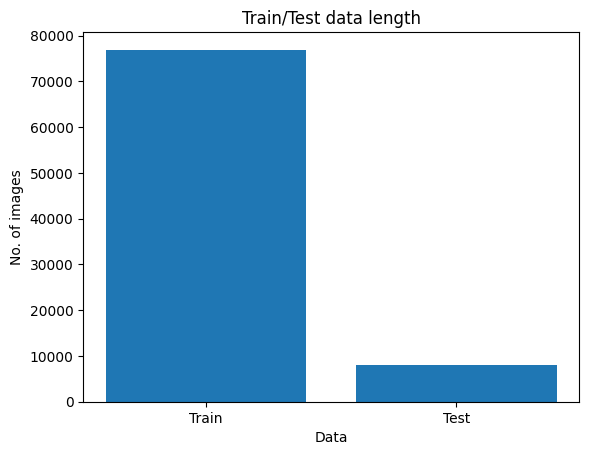

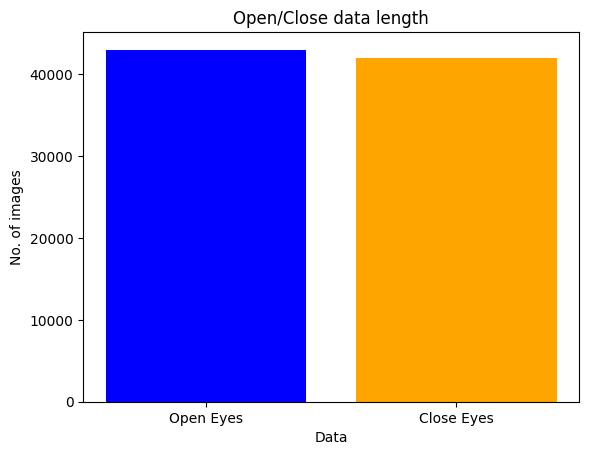

In [5]:
train_open_folder = "../prepared_data/train/open_eyes"
train_close_folder = "../prepared_data/train/close_eyes"
test_open_folder = "../prepared_data/test/open_eyes"
test_open_folder = "../prepared_data/test/close_eyes"
tro = len(os.listdir(train_open_folder))
trc = len(os.listdir(train_close_folder))
teo = len(os.listdir(test_open_folder))
tec = len(os.listdir(test_open_folder))

data = [tro+trc, teo+tec]
plt.bar(["Train", "Test"], data)
plt.xlabel("Data")
plt.ylabel("No. of images")
plt.title("Train/Test data length")
plt.show()

data = [tro+teo, trc+tec]
plt.bar(["Open Eyes"], tro+teo, color="b")
plt.bar(["Close Eyes"], trc+tec, color="orange")
plt.xlabel("Data")
plt.ylabel("No. of images")
plt.title("Open/Close data length")
plt.show()